In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("Pima_Indian_diabetes.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [5]:
for feature in features:
    df[feature].fillna(value=df[feature].mean(), inplace=True)

Text(0, 0.5, 'Glucose')

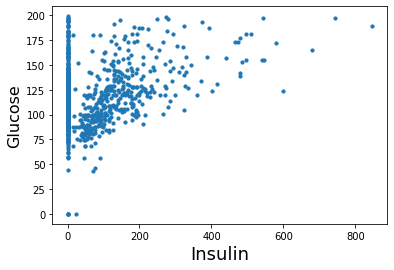

In [6]:
plot = plt.scatter(x=df.Insulin, y=df.Glucose, s=10)
plt.xlabel('Insulin', fontsize=18)
plt.ylabel('Glucose', fontsize=16)

In [7]:
zero_insulin_data = df[ df.Insulin == 0 ]
non_zero_insulin_data = df[ df.Insulin != 0]

train_X = non_zero_insulin_data['Glucose'].values.reshape(-1,1)
train_y = non_zero_insulin_data['Insulin'].values.reshape(-1,1)
val_X = zero_insulin_data['Glucose'].values.reshape(-1,1)

model = LinearRegression()
model.fit(train_X, train_y)
predicted_y = model.predict(val_X)

j = 0
for i in df.index:
    if df.at[i, 'Insulin'] == 0:
        df.at[i, 'Insulin'] = predicted_y[j][0]
        j+=1


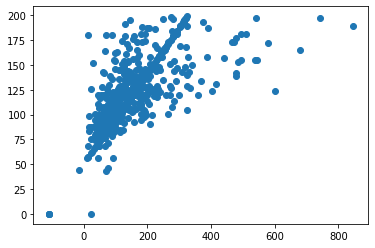

In [8]:
plot = plt.scatter(x=df.Insulin, y=df.Glucose)

In [9]:
for feature in features:
    df.loc[df[feature] < 0, feature] = 0

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.885689,119.966097,68.895389,20.357580,153.368229,31.760002,0.471876,33.761336,0.348958
std,3.384891,32.028277,19.393614,15.668404,97.423387,8.261584,0.331329,12.144139,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,90.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,135.000000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,190.075164,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.loc[df.Insulin >250, 'Insulin'] = 250

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.885689,119.966097,68.895389,20.357580,141.520366,31.760002,0.471876,33.761336,0.348958
std,3.384891,32.028277,19.393614,15.668404,65.819238,8.261584,0.331329,12.144139,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,90.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,135.000000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,190.075164,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,250.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
X = df[df.columns[0:8]]
y = df[df.columns[8]]

In [14]:
trainX, valX, trainY, valY = train_test_split(X, y, random_state=0, test_size = 0.20)

In [15]:
lr = LogisticRegression(max_iter=2000)

In [16]:
lr.fit(trainX, trainY)
print(lr.score(valX, valY))

0.8116883116883117


/home/k/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
